In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from io import StringIO
import io
from collections import namedtuple
from datetime import datetime,timedelta
import sys
import json
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import interpolate
import functools

6 6


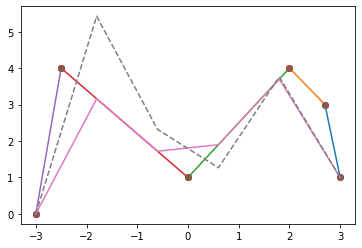

In [2]:
#,  (-2.5, -4), (0, -1), (2.5, -4), (3, -1),
plist = [(3 , 1),
         (2.7,3),
         (2, 4), 
         (0, 1),
         (-2.5, 4),
         (-3, 0)]

mylist=iter(plist)

list_x=[]
list_y=[]
first_time=True
while True:
    try:
        
        if first_time:
            x1,y1=next(mylist)
            x2,y2=next(mylist)
            plt.scatter([x1,x2],[y1,y2])
            x=np.linspace(x1, x2, num=11, endpoint=True)
            y=np.linspace(y1, y2, num=11, endpoint=True)
            first_time=False
            prev_x=x2
            prev_y=y2
            list_x.append(x)
            list_y.append(y)
        else:
            x1,y1=next(mylist)
            x=np.linspace(prev_x,x1, num=11, endpoint=True)
            y=np.linspace(prev_y, y1, num=11, endpoint=True)
            prev_x=x1
            prev_y=y1
            plt.scatter([prev_x,x1],[prev_y,y1])
            list_x.append(x)
            list_y.append(y)

        plt.plot(x, y)
        
    except StopIteration:
        break
        
list_x=[]
list_y=[]
for x,y in plist:
    list_x.append(x)
    list_y.append(y)
    

x=np.array(list_x)
y=np.array(list_y)
print(len(x),len(y))
f = interp1d(x,y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(min(x), max(x), num=len(x), endpoint=True)
plt.plot(x, y, 'o',xnew, f(xnew), xnew, f2(xnew), '--')

plt.show()

In [3]:
lst = [['05-05-2015', -40], ['05-05-2015', 30], ['07-05-2015', -75], ['05-05-2015', -40], ['05-05-2015', 120], ['07-05-2015', -150]]

df=pd.DataFrame(columns=['Date','Amount'])
for item in lst:
    print(item)
    df=df.append({'Date':item[0],'Amount':item[1]},ignore_index=True)
    
df.set_index('Date',inplace=True)
grouped=df.groupby(df.index)['Amount'].sum()

res=[[item[0],item[1]] for item in grouped.items()]

print(res)    

['05-05-2015', -40]
['05-05-2015', 30]
['07-05-2015', -75]
['05-05-2015', -40]
['05-05-2015', 120]
['07-05-2015', -150]
[['05-05-2015', 70], ['07-05-2015', -225]]


In [29]:
data=[{'value': ['raj', 'kumar']},
{'value':  ['kill', 'bill']}]
df=pd.DataFrame(data)
print(df)
def concatWords(lst):
    return functools.reduce(lambda x,y: x+" "+y,lst)
df["value"]=df["value"].apply(concatWords)
print(df)

          value
0  [raj, kumar]
1  [kill, bill]
       value
0  raj kumar
1  kill bill


In [38]:
data = {'Name': [27, 27, 30, 30, 43, 43, 50, 62, 62],
        'Time': [10, 30, 23.4, 28.6, 10, 15, 20, 25, 50]}

keys=set(data['Name'])
lst=list(zip(data['Name'],data['Time']))
print(lst)

results={}
for key in keys:
    value=functools.reduce(lambda x,y: y-x ,[x[1] for x in lst if x[0]==key])
    results[key]=value
    
print(results)

[(27, 10), (27, 30), (30, 23.4), (30, 28.6), (43, 10), (43, 15), (50, 20), (62, 25), (62, 50)]
{43: 5, 50: 20, 30: 5.200000000000003, 27: 20, 62: 25}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

batch_size=67300
data = np.random.rand(batch_size, 25)
#for item in data:
#    print(item)
label = np.random.randint(0,2,(batch_size,1))
#print(data)
df=pd.DataFrame(data)
df2=pd.DataFrame(label,columns=["Target"])
df=pd.concat([df,df2],axis=1)
#print(df)

columns=[x for x in df.columns if x!="Target"]
X=df[columns]
y=df["Target"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

model= Sequential()

model.add(Dense(25, input_shape=(len(columns),),activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#model.compile(optimizer=Adam(0.01),loss='binary_crossentropy')
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

history=model.fit(X_train, y_train,epochs = 100,verbose=0)

model.evaluate(X_test, y_test)

plt.plot(history.history['loss'])
plt.title('loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 25)                650       
                                                                 
 dense_150 (Dense)           (None, 128)               3328      
                                                                 
 dense_151 (Dense)           (None, 128)               16512     
                                                                 
 dense_152 (Dense)           (None, 128)               16512     
                                                                 
 dense_153 (Dense)           (None, 1)                 129       
                                                                 
Total params: 37,131
Trainable params: 37,131
Non-trainable params: 0
_________________________________________________________________


In [101]:
print(model.metrics_names)



['loss', 'accuracy']
